# Real Data Diversity Estimation

The notebook reproduces the real data diversity analysis in the paper [__A causal view on compositional data__](https://arxiv.org/abs/2106.11234) by E. Ailer, C. L. Müller and N. Kilbertus.

In this section we explain the figure on the one-dimensional causal effect estimation of diversity on the weight. We apply the different methods on the Shannon diversity and the Simpson diversity to show that diversity might produce inconclusive results. This mostly serves as our motivation to then look deeper into the higher dimensional approach of using the whole compositional vector for the microbiome.


In [1]:
# standard libraries
import sys
import os
sys.path.append(os.path.join(os.getcwd(), "../src"))
import pandas as pd
import statsmodels.api as sm
from statsmodels.sandbox.regression.gmm import IV2SLS
import plotly.graph_objects as go
from skbio.diversity import alpha_diversity


# paper relevant function files
from helper_fct import *
import boundiv
import kiv
from plot_fct import colours, update_layout, plot_diversity_methods
#from run_methods_confidence import run_diversity_estimation_methods

In [2]:
%load_ext autoreload
%autoreload 2

# Data Analysis

##  Read in data

<div class="alert alert-block alert-info">
<b>Note:</b>    
    
The data and the pre-processing steps can be found in the folder `input`.
</div>


In [3]:
save_path = "/Users/elisabeth.ailer/Projects/P1_Microbiom/Code/Figures/RealData/Diversity"

In [4]:
agg_level = "Family"
filter = "no_filter"

res_path = agg_level + "_" + filter + "_diversity_estimation.npy"
res = np.load(os.path.join(save_path, res_path), allow_pickle=True).item()

INFO:jax._src.xla_bridge:Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': module 'jaxlib.xla_extension' has no attribute 'get_tpu_client'


# Visualization

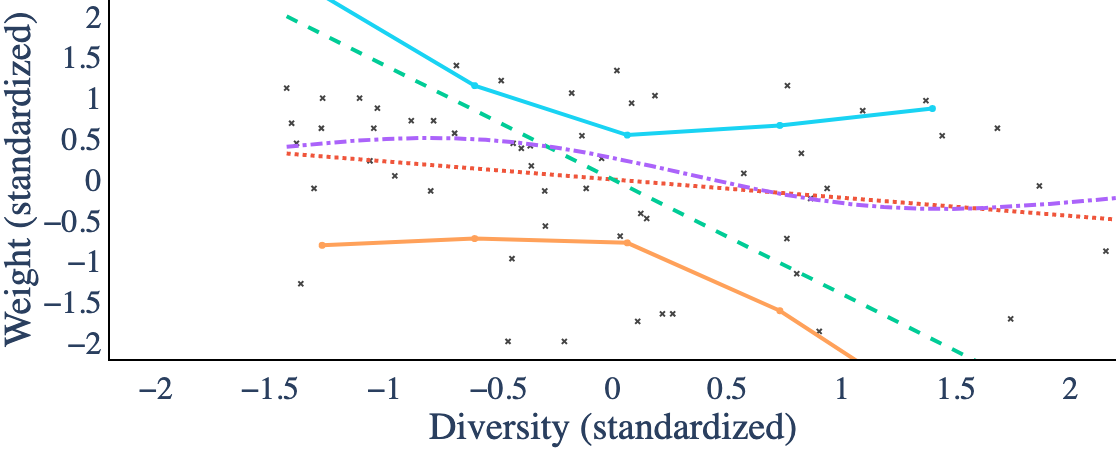

In [59]:
# CHAO

plot = res["chao"]
fig = plot_diversity_methods(plot["x"], plot["y"], plot["xstar"], plot["xstar_bound"], plot["ystar_ols"], 
                             plot["ystar_2sls"], plot["ystar_kiv"], plot["results"])
fig.update_xaxes(range=[-2.2, 2.2])
fig.update_yaxes(range=[-2.2, 2.2])
fig.update_layout(width=1000, height=450, showlegend=False)
fig.write_image(os.path.join(save_path, agg_level + "_" + filter + "_chao.pdf"))
fig.show()

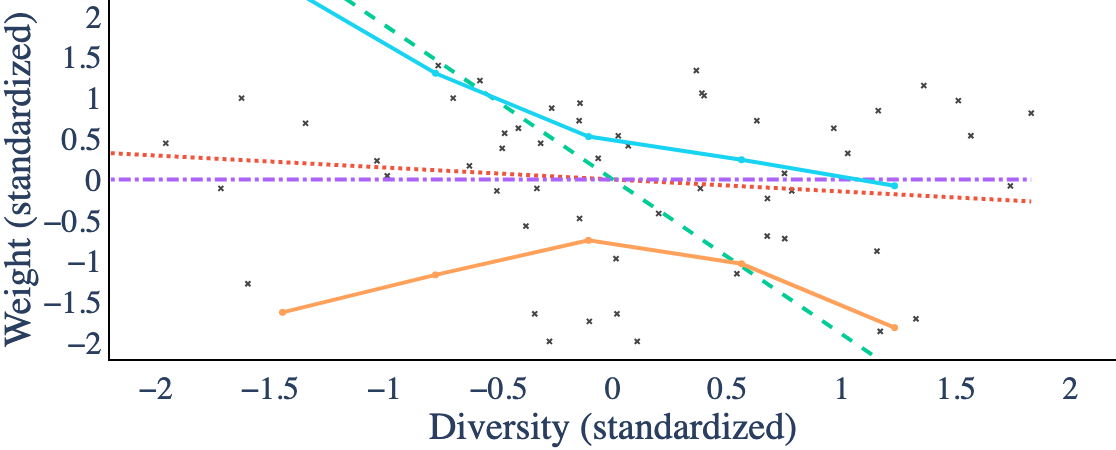

In [60]:
# Shannon

plot = res["shannon"]
fig = plot_diversity_methods(plot["x"], plot["y"], plot["xstar"], plot["xstar_bound"], plot["ystar_ols"], 
                             plot["ystar_2sls"], plot["ystar_kiv"], plot["results"])
fig.update_xaxes(range=[-2.2, 2.2])
fig.update_yaxes(range=[-2.2, 2.2])
fig.update_layout(width=1000, height=450, showlegend=False)
fig.write_image(os.path.join(save_path, agg_level + "_" + filter + "_shannon.pdf"))
fig.show()

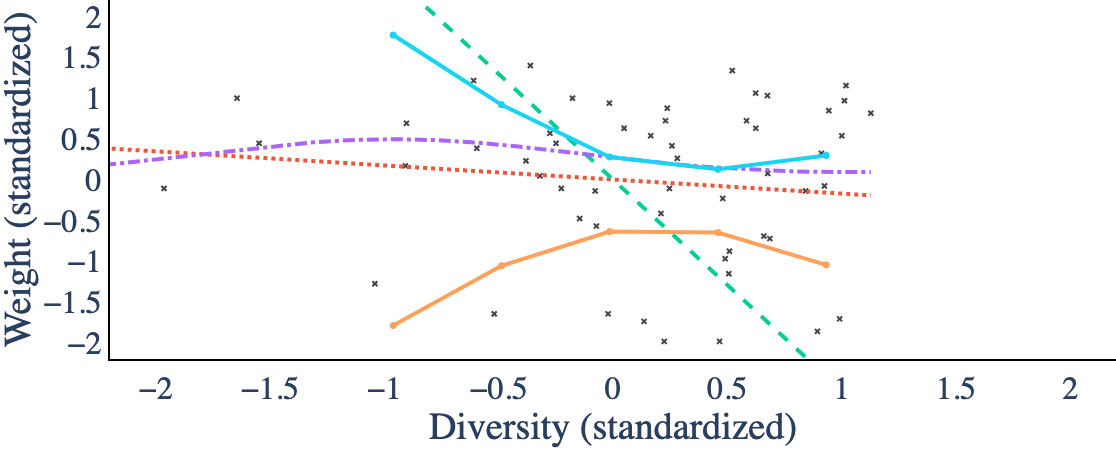

In [61]:
# Simpson

plot = res["simpson"]
fig = plot_diversity_methods(plot["x"], plot["y"], plot["xstar"], plot["xstar_bound"], plot["ystar_ols"], 
                             plot["ystar_2sls"], plot["ystar_kiv"], plot["results"])
fig.update_xaxes(range=[-2.2, 2.2])
fig.update_yaxes(range=[-2.2, 2.2])
fig.update_layout(width=1000, height=450, showlegend=False)
fig.write_image(os.path.join(save_path, agg_level + "_" + filter + "_simpson.pdf"))
fig.show()